## Mínimos cuadrados: caso continuo

Sea $\mathcal{P}_{n}$ el conjunto de todos los polinomios de grado menor o igual a $n$, donde $n \geq 0$. El objetivo de la aproximación polinomial es encontrar un polinomio de un grado dado $n$ que provea la *mejor aproximación* a una función dada. La respuesta a este problema variará según lo que entendamos por mejor aproximación. En particular, consideremos una función $f \in C[a, b]$, donde $[a, b]$ es un intervalo no vacío y acotado. La norma 2 de $f$ está dada por 

$$ || f || _{2} = \left( \int\limits_a^b w(x) (f(x))^{2} dx \right) ^{ \frac{1}{2} } $$

donde $w$ es una función de peso que es positiva, continua e integrable en $(a, b)$. Equipados con esta noción, podemos definir el problema de mínimos cuadrados como un problema computacional de la siguiente forma:

---

**Entrada:** Una función $f \in C[a, b]$ y un $n \in \mathbb{N}$.

**Salida:** $p_{n} \in \mathcal{P}_{n}$ tal que 

$$ || f - p_{n} ||_{2} = \min_{q \in \mathcal{P}_{n}} || f - q ||_{2}  $$

---

El $p_{n}$ en la salida se denomina polinomio de mejor aproximación de grado $n$ para $f$ respecto a la norma $2$ en $(a, b)$. La demostración de la existencia y unicidad de $p_{n}$ se puede encontrar en [S&M], entre otras fuentes.

El problema anterior es equivalente al de minimizar 

$$
(1.1) \hspace{1.5cm}  || f - p_{n} ||_{2}^{2} =  \int\limits_a^b w(x) (f(x) - p_{n}(x))^{2} dx 
$$

y precisamente por eso se denomina *mínimos cuadrados*: se busca minimizar la norma al cuadrado, o el error cuadrático. Si escribimos $p_{n}$ como

$$ p_{n}(x) = a_{0} + a_{1}x + \ldots + a_{n}x^{n} $$

queremos elegir coeficientes $a_{0}, a_{1}, \ldots , a_{n}$ que minimicen $(1.1)$; al derivar parcialmente esta expresión respecto a cada $a_{j}$ obtenemos el siguiente sistema de $n+1$ ecuaciones para los $n+1$ coeficientes:

$$ \begin{array}{rcr} a_{0}\langle 1, 1 \rangle + a_{1}\langle 1, x \rangle + a_{2}\langle 1, x^{2} \rangle + \ldots + a_{n}\langle 1, x^{n} \rangle
& = & \langle f, 1 \rangle \\ 
a_{0}\langle x, 1 \rangle + a_{1}\langle x, x \rangle + a_{2}\langle x, x^{2} \rangle + \ldots + a_{n}\langle x, x^{n} \rangle
& = & \langle f, x \rangle \\  \vdots \\ 
a_{0}\langle x^{n}, 1 \rangle + a_{1}\langle x^{n}, x \rangle + a_{2}\langle x^{n}, x^{2} \rangle + \ldots + a_{n}\langle x^{n}, x^{n} \rangle
& = & \langle f, x^{n} \rangle  \end{array} $$

donde $\langle f, g\rangle = \int\limits_a^b w(x) f(x)g(x)dx $ denota el producto interno en $C[a, b]$ respecto a una función de peso $w$.

### Dependencias

In [2]:
from sympy import *
from sympy.abc import x
from sympy.solvers.solveset import linsolve #para solucionar SEL
from scipy.integrate import quad #integración numérica

from IPython.display import display, Latex
from sympy.plotting import plot;
import matplotlib.pyplot as mpl

mpl.rcParams['figure.figsize'] = 8, 8

from sympy.interactive import printing;
printing.init_printing(use_latex=True);

### Parámetros

In [3]:
#Función
f = 1/x

#Extremos del intervalo
a = 1
b = 3

#Grado del polinomio
n = 10

### Desarollo

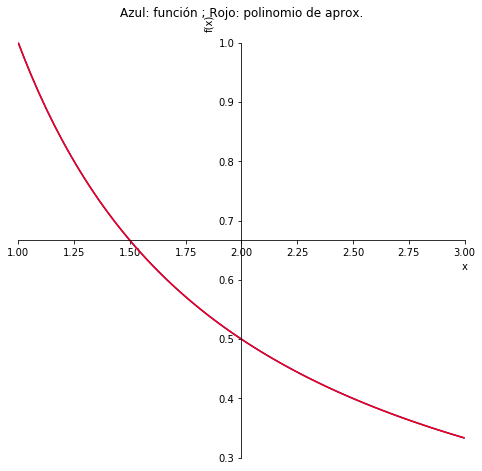

<IPython.core.display.Latex object>

In [4]:
#Partiendo de las ecuaciones normales y calculando los productos internos,
#se puede demostrar que en este caso la entrada ij-ésima de la matriz A 
#está dada por (b**(i+j+1) - a**(i+j+1))/(i+j+1). Este hecho resulta últil para 
#construir la matriz A con una expresión lambda:
A = Matrix(n + 1, n + 1, lambda i,j: (b**(i+j+1) - a**(i+j+1))/(i+j+1))

#Construimos la matriz b
B = Matrix(n + 1, 1, lambda i, j: quad( lambda x: eval(str(f))*x**i , a, b)[0] )

#Declaramos un arreglo para los coeficientes
coeffs = []
for i in range(0, n+1):
    coeffs.append(Symbol('a'+str(i)))

#Resolvemos el sistema de ecuaciones
c = linsolve((A, B), coeffs)

#Construimos el polinomio
pol = c.args[0].args[0]
for i in range(1, n+1):
    pol += (c.args[0].args[i])*x**i

function = sympify(f)    
    
p = plot(function, pol, (x, a, b), show = False, title = 'Azul: función ; Rojo: polinomio de aprox.')
p[0].line_color='b'; #Se muestra en azul la función original
p[1].line_color='r'; #En rojo el polinomio de aproximación
p.show()
display(Latex('$$ p_{'+ str(n) +'} (x) = '+latex(pol)+'$$'))


### Referencias

[S&M] Süli, E., & Mayers, D. F. (2002). Approximation in the 2-norm. En *An introduction to numerical analysis*. Cambridge: Cambridge University Press.